In [1]:
import pandas as pd
import numpy as np

import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import plotly.io as pio

plotly.offline.init_notebook_mode()

## Data Processing (dataframe)

In [2]:
def get_action_type(s):
    return s.split('-')[-2]

In [4]:
resultFName = 'results20191017'
dirOutput = 'C:/Users/syluk/OneDrive - UNSW/Thesis - Sparse Mocap/Goal01-CKF/Publication-TBME-20190329'
result_mat_path = '{}/{}.csv'.format(dirOutput, resultFName)
summary_output_path = '{}/summary.csv'.format(dirOutput)

df = pd.read_csv(result_mat_path)
df['type'] = df['name'].apply(lambda s: s.split('-')[-2])
df['subj'] = df['name'].apply(lambda s: s.split('-')[1])
n1 = lambda x, y: ['{}{}'.format(x, i) for i in y]
n2 = lambda x: n1(x, [1,2,3])

for s in ['RMSE', 'RMSEnobias', 'Std', 'Mean', 'CorrCoef']:
    if not s in ['CorrCoef', 'RMSEnobias']:
        df['anklePos{}'.format(s)] = np.mean(df[n2('LTIO{}_'.format(s))+n2('RTIO{}_'.format(s))], axis=1)
        df['ankleLPos{}'.format(s)] = np.mean(df[n2('LTIO{}_'.format(s))], axis=1)
        df['ankleRPos{}'.format(s)] = np.mean(df[n2('RTIO{}_'.format(s))], axis=1)
        df['kneePos{}'.format(s)] = np.mean(df[n2('LFEO{}_'.format(s))+n2('RFEO{}_'.format(s))], axis=1)
    df['kneeOriY{}'.format(s)] = np.mean(df[['qLKNE{}_2'.format(s), 'qRKNE{}_2'.format(s)]], axis=1)
    df['kneeLOriY{}'.format(s)] = np.mean(df[['qLKNE{}_2'.format(s)]], axis=1)
    df['kneeROriY{}'.format(s)] = np.mean(df[['qRKNE{}_2'.format(s)]], axis=1)
    df['hipOri{}'.format(s)] = np.mean(df[n2('qLHIP{}_'.format(s))+n2('qRHIP{}_'.format(s))], axis=1)
    for k, v in [('X', '1'), ('Y', '2'), ('Z', '3')]:
        df['hipOri{}{}'.format(k, s)] = np.mean(df[['qLHIP{}_{}'.format(s, v), 'qRHIP{}_{}'.format(s, v)]], axis=1)
df['dOribias'] = np.mean(df[n2('dOribias_')], axis=1)

df_nos3 = df[df['subj']!='S03']

# vanilla df_results
df_result = df.groupby(['type', 'label']).mean()
df_result2 = df.groupby(['type', 'label']).std()

# df_results no s3
df_result_nos3 = df_nos3.groupby(['type', 'label']).mean()
df_result2_nos3 = df_nos3.groupby(['type', 'label']).std()

for meandf, stddf in [(df_result, df_result2), (df_result_nos3, df_result2_nos3)]:
    for i in ['runtime', 'dOri', 'dOrinobias', 'dOribias', 'dPos', 'dPosW']:
        meandf['{}Std'.format(i)] = stddf[i]
    for s in ['RMSE', 'RMSEnobias', 'Std', 'Mean', 'CorrCoef']:
        if not s in ['CorrCoef', 'RMSEnobias']:
            for t in ['anklePos', 'ankleLPos', 'ankleRPos', 'kneePos']:
                meandf['{}{}Std'.format(t,s)] = stddf['{}{}'.format(t,s)]
        for t in ['kneeOriY', 'kneeLOriY', 'kneeROriY', 'hipOri', 'hipOriX', 'hipOriY', 'hipOriZ']:
            meandf['{}{}Std'.format(t,s)] = stddf['{}{}'.format(t,s)]

df_result.to_csv(summary_output_path)

In [5]:
df.to_csv('{}/{}-2.csv'.format(dirOutput, resultFName))

In [6]:
df_result.head()

posMeanRMSE  \
type          label                                                       
FigureofEight NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355     0.029931   
              NS2+viconvsxsens                                 0.030777   
Fivemin       NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355     0.029051   
              NS2+viconvsxsens                                 0.032525   
HighKneeJog   NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355     0.098806   

                                                            posMeanMean  \
type          label                                                       
FigureofEight NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355     0.000329   
              NS2+viconvsxsens                                -0.006923   
Fivemin       NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355    -0.000238   
              NS2+viconvsxsens                                -0.006344   
HighKneeJog   NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355     0.037153   

                                                            oriMeanRMSE  \
type          label                                                       
FigureofEight NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355    11.722089   
              NS2+viconvsxsens                                16.493196   
Fivemin       NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355    11.226689   
              NS2+viconvsxsens                                16.045543   
HighKneeJog   NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355    24.159444   

                                                            oriMeanMean  \
type          label                                                       
FigureofEight NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355    -2.283733   
              NS2+viconvsxsens                                -1.876683   
Fivemin       NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355    -1.513212   
              NS2+viconvsxsens                                -2.128381   
HighKneeJog   NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355   -14.356127   

                                                            MIDPELRMSE_1  \
type          label                                                        
FigureofEight NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355           0.0   
              NS2+viconvsxsens                                       0.0   
Fivemin       NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355           0.0   
              NS2+viconvsxsens                                       0.0   
HighKneeJog   NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355           0.0   

                                                            MIDPELRMSE_2  \
type          label                                                        
FigureofEight NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355           0.0   
              NS2+viconvsxsens                                       0.0   
Fivemin       NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355           0.0   
              NS2+viconvsxsens                                       0.0   
HighKneeJog   NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355           0.0   

                                                            MIDPELRMSE_3  \
type          label                                                        
FigureofEight NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355           0.0   
              NS2+viconvsxsens                                       0.0   
Fivemin       NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355           0.0   
              NS2+viconvsxsens                                       0.0   
HighKneeJog   NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355           0.0   

                                                            MIDPELStd_1  \
type          label                                                       
FigureofEight NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355          0.0   
              NS2+viconvsxsens                                      0.0   
Fivemin       NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C35

In [7]:
df_result_nos3.head()

posMeanRMSE  \
type          label                                                       
FigureofEight NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355     0.029931   
              NS2+viconvsxsens                                 0.030777   
Fivemin       NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355     0.029051   
              NS2+viconvsxsens                                 0.032525   
HighKneeJog   NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355     0.098806   

                                                            posMeanMean  \
type          label                                                       
FigureofEight NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355     0.000329   
              NS2+viconvsxsens                                -0.006923   
Fivemin       NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355    -0.000238   
              NS2+viconvsxsens                                -0.006344   
HighKneeJog   NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355     0.037153   

                                                            oriMeanRMSE  \
type          label                                                       
FigureofEight NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355    11.722089   
              NS2+viconvsxsens                                16.493196   
Fivemin       NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355    11.226689   
              NS2+viconvsxsens                                16.045543   
HighKneeJog   NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355    24.159444   

                                                            oriMeanMean  \
type          label                                                       
FigureofEight NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355    -2.283733   
              NS2+viconvsxsens                                -1.876683   
Fivemin       NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355    -1.513212   
              NS2+viconvsxsens                                -2.128381   
HighKneeJog   NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355   -14.356127   

                                                            MIDPELRMSE_1  \
type          label                                                        
FigureofEight NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355           0.0   
              NS2+viconvsxsens                                       0.0   
Fivemin       NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355           0.0   
              NS2+viconvsxsens                                       0.0   
HighKneeJog   NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355           0.0   

                                                            MIDPELRMSE_2  \
type          label                                                        
FigureofEight NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355           0.0   
              NS2+viconvsxsens                                       0.0   
Fivemin       NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355           0.0   
              NS2+viconvsxsens                                       0.0   
HighKneeJog   NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355           0.0   

                                                            MIDPELRMSE_3  \
type          label                                                        
FigureofEight NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355           0.0   
              NS2+viconvsxsens                                       0.0   
Fivemin       NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355           0.0   
              NS2+viconvsxsens                                       0.0   
HighKneeJog   NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355           0.0   

                                                            MIDPELStd_1  \
type          label                                                       
FigureofEight NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355          0.0   
              NS2+viconvsxsens                                      0.0   
Fivemin       NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C35

## Graph Reports

In [7]:
def plot_results(df_result, traces_name, target, title='', showstd=True, ylabel='rmse (m)', imgsize=(100,100), fontsize=12, xTypes = [], fname=''):
    # target2 = target.replace('RMSE', '').replace('Mean', '').replace('CorrCoef', '')
    
    traces = []
    for k in traces_name:
        v = traces_name[k]
        idx = (df_result.index.get_level_values('label') == v)
        
        df_buf = df_result.iloc[idx].reset_index(level='label')
        if len(xTypes) == 0:
            xTypesKeys = df_buf['{}'.format(target)].index.get_level_values('type').values
            xTypesVals = xTypesKeys
        else:
            xTypesKeys = list(xTypes.keys())
            xTypesVals = list(xTypes.values())
        df_buf2 = df_buf.loc[xTypesKeys]
    
        trace = go.Bar(
            x=xTypesVals,
            y=df_buf2['{}'.format(target)].values,
            name=k,
            error_y=dict(
                type='data',
                array=df_buf2['{}Std'.format(target)].values,
                visible=showstd
            )
        )
        traces.append(trace)

    layout = go.Layout(
        title=title,
        xaxis=dict(),
        yaxis=dict(
            title=ylabel,
        ),
        height=imgsize[0],
        width=imgsize[1],
        margin=dict(l=80,r=10,b=0,t=10,pad=4),
        legend=dict(orientation="h", xanchor="center", x=0.5, y=-.2),
        font=dict(size=fontsize),
        barmode='group'
    )
    fig = go.Figure(data=traces, layout=layout)
    plotly.offline.iplot(fig, filename='{}-bar.html'.format(target))
    
    if not fname == '':
        pio.write_image(fig, fname)

In [8]:
def plot_results2(df_result, traces_name, targets, title='', showstd=True, ylabel='rmse (m)', imgsize=(100,100), fontsize=12, yrange=False, xTypes = [], fname=''):
    traces = []
    for k in traces_name:
        for l in targets:
            v = traces_name[k]
            target = targets[l]
            # target2 = target.replace('RMSE', '').replace('Mean', '').replace('CorrCoef', '')
            
            idx = (df_result.index.get_level_values('label') == v)

            df_buf = df_result.iloc[idx].reset_index(level='label')
            
            if len(xTypes) == 0:
                xTypesKeys = df_buf['{}'.format(target)].index.get_level_values('type').values
                xTypesVals = xTypesKeys
            else:
                xTypesKeys = list(xTypes.keys())
                xTypesVals = list(xTypes.values())
            df_buf2 = df_buf.loc[xTypesKeys]

            trace = go.Bar(
                x=xTypesVals,
                y=df_buf2['{}'.format(target)].values,
                name='{}{}'.format(k, l),
                error_y=dict(
                    type='data',
                    array=df_buf2['{}Std'.format(target)].values,
                    visible=showstd
                )
            )
            traces.append(trace)
            
    yDict = dict(title=ylabel)
    if yrange:
        yDict['range'] = yrange
        
    layout = go.Layout(
        title=title,
        xaxis=dict(),
        yaxis=yDict,
        height=imgsize[0],
        width=imgsize[1],
        margin=dict(l=80,r=10,b=0,t=10,pad=4),
        legend=dict(orientation="h", xanchor="center", x=0.5, y=-.2),
        font=dict(size=fontsize),
        barmode='group'
    )
    fig = go.Figure(data=traces, layout=layout)
    plotly.offline.iplot(fig, filename='{}-bar.html'.format(target))
    
    if not fname == '':
        pio.write_image(fig, fname)

## Plot for the technical paper

In [10]:
traces_name = {'CKF-Vicon': 'NS2+Aw__vOw__vIw__v+Sav03+M76+C355',
               'CKF-3IMU': 'NS2+Aw__sOw__sIw__v+Sav03+M76+C355',
               'OSPS': 'NS2+viconvsxsens',}
xTypes = {'Static': 'Static', 'Walk': 'Walk', 'FigureofEight': 'Figure of Eight', 'Zigzag': 'Zigzag', 'Fivemin': 'Fivemin walk'}
df_tmp = df_result_nos3.copy()
df_tmp[['dPos', 'dPosW', 'dPosStd', 'dPosWStd']] = 100*df_tmp[['dPos', 'dPosW', 'dPosStd', 'dPosWStd']]

In [10]:
plot_results(df_tmp, traces_name, 'dPos', title='', ylabel='cm', xTypes=xTypes, 
             showstd=True, imgsize=(300,750), fontsize=12, fname='results-dposmean.png')

In [11]:
targets = {'dOri': 'dOri', 'dOrinobias': 'dOrinobias'}
plot_results2(df_tmp, traces_name, targets, ylabel='deg', xTypes=xTypes, 
             showstd=True, imgsize=(300,750), fontsize=12, fname='results-dorimean.png')

In [12]:
traces_name = {'': 'NS2+viconvsxsens'}
targets = {'knee Y': 'kneeOriYRMSE', 'knee Y (nb)': 'kneeOriYRMSEnobias', 
           'hip Y':'hipOriYRMSE', 'hip Y (nb)':'hipOriYRMSEnobias', 
           'hip X':'hipOriXRMSE', 'hip X (nb)':'hipOriXRMSEnobias',
           'hip Z':'hipOriZRMSE', 'hip Z (nb)':'hipOriZRMSEnobias'}
plot_results2(df_tmp, traces_name, targets, ylabel='deg', xTypes=xTypes, 
              showstd=True, imgsize=(300,750), fontsize=12, fname='results-kneehiprmse.png')

In [13]:
traces_name = {'': 'NS2+Aw__sOw__sIw__v+Sav03+M76+C355'}
targets = {'knee Y': 'kneeOriYCorrCoef', 'hip Y':'hipOriYCorrCoef', 
           'hip X':'hipOriXCorrCoef', 'hip Z':'hipOriZCorrCoef'}
plot_results2(df_tmp, traces_name, targets, ylabel='CC', xTypes=xTypes, 
              showstd=True, imgsize=(300,750), fontsize=12, yrange=[0,1], fname='results-kneehipcc.png')

## with respect the Vicon system

In [8]:
for (a,b,c) in [(df, df_result, 'a'), (df_nos3, df_result_nos3, 'b')]:
    idx = [i in ['Walk', 'FigureofEight', 'Zigzag', 'Fivemin'] for i in a['type']]
    df_walk = a.iloc[idx].groupby(['label']).mean()
    df_walk2 = a.iloc[idx].groupby(['label']).std()
    df_walk['type'] = 'All walking'

    idx = [i in ['Static', 'Walk', 'FigureofEight', 'Zigzag', 'Fivemin'] for i in a['type']]
    df_nondyn = a.iloc[idx].groupby(['label']).mean()
    df_nondyn2 = a.iloc[idx].groupby(['label']).std()
    df_nondyn['type'] = 'All nondynamic'

    for meandf, stddf in [(df_walk, df_walk2), (df_nondyn, df_nondyn2)]:
        meandf['runtimeStd'] = stddf['runtime']
        meandf['dOriStd'] = stddf['dOri']
        meandf['dPosStd'] = stddf['dPos']
        for s in ['RMSE', 'Std', 'Mean', 'CorrCoef']:
            if not s == 'CorrCoef':
                for t in ['anklePos', 'ankleLPos', 'ankleRPos', 'kneePos']:
                    meandf['{}{}Std'.format(t,s)] = stddf['{}{}'.format(t,s)]
            for t in ['kneeOriY', 'kneeLOriY', 'kneeROriY', 'hipOri', 'hipOriX', 'hipOriY', 'hipOriZ']:
                meandf['{}{}Std'.format(t,s)] = stddf['{}{}'.format(t,s)]

    df_csv = pd.concat([b.reset_index(), df_walk.reset_index(), df_nondyn.reset_index()])
    inv_map = {v: k for k, v in traces_name.items()}
    df_csv['label'] = df_csv['label'].apply(lambda s: inv_map[s] if s in inv_map else s)
    df_csv.to_csv('{}/{}-3{}.csv'.format(dirOutput, resultFName, c))

C:\Users\syluk\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




NameError: name 'traces_name' is not defined

In [9]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
from matplotlib import rc
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple

import pandas as pd
import numpy as np

In [10]:
def generate_dfplot(df_target, traces_name, xTypes):
    iterables = [xTypes.keys(), traces_name.keys()]    
    df_plot = pd.DataFrame(index = pd.MultiIndex.from_product(iterables, names=['type', 'label']), 
                           columns = df_target.columns)
    
    for i in xTypes:
        for j in traces_name:
            buf = df_target.loc[(xTypes[i], traces_name[j]), :]
            if len(buf.shape) == 1:
                df_plot.loc[(i, j)] = buf
            else:
                df_plot.loc[(i, j)] = buf.mean()
    
    # adjust unit
    for i in ['dPos', 'dPosStd']:
        df_plot.loc[:, i] = 100*df_plot.loc[:, i]

    return df_plot

def generate_dfplot2(df_target, traces_name, traces_targets, xTypes, 
                     columns = ["RMSE", "RMSEStd", "CorrCoef", "CorrCoefStd", 
                                "Mean", "MeanStd", "RMSEnobias", "RMSEnobiasStd"]):
    if len(traces_targets) == 1:
        iterables = [xTypes.keys(), traces_name.keys()]
    else:
        iterables = [xTypes.keys(), ["{} {}".format(j, i) for i in traces_name for j in traces_targets]]
    
    df_plot = pd.DataFrame(index = pd.MultiIndex.from_product(iterables, names=['type', 'label']), 
                           columns = columns)
    for i in xTypes:
        for j in traces_targets:
            for k in traces_name:
                buf = df_target.loc[(xTypes[i], traces_targets[j]), ["{}{}".format(traces_name[k], l) for l in columns]]
                if len(traces_targets) > 1:
                    targetBuf = "{} {}".format(j, k)
                else:
                    targetBuf = k

                if len(buf.shape) == 1:
                    df_plot.loc[(i, targetBuf)] = buf.values
                else:
                    df_plot.loc[(i, targetBuf)] = buf.mean().values

    return df_plot

In [11]:
df_target = df_result_nos3
for i in ['dOribias', 'dOribiasStd']:
        df_target.loc[:, i] = np.rad2deg(df_target.loc[:, i])
        
traces_name = {"$\it{CKF}$-$\it{Vicon}$": 'NS2+ckf+Aw__vOw__vIw__v+Sav03+P001+M076+C355',
               "$\it{CKF}$-$\it{3IMU}$": 'NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355',
               "$\it{OSPS}$": 'NS2+viconvsxsens'
               }                
xTypes = {'Static': 'Static', 'Walk': 'Walk', 'Figure of eight': 'FigureofEight',
          'Zig-zag': 'Zigzag', '5-minute walk': 'Fivemin',
          'Walk mean': ['Walk', 'FigureofEight', 'Zigzag', 'Fivemin'] }

df_plot = generate_dfplot(df_target, traces_name, xTypes)

traces2_name = {'knee Y': 'kneeOriY', 'hip Y': 'hipOriY', 'hip X': 'hipOriX', 'hip Z': 'hipOriZ'}
traces2_targets = {"": traces_name["$\it{CKF}$-$\it{3IMU}$"]}
df_plot2 = generate_dfplot2(df_target, traces2_name, traces2_targets, xTypes)

traces3_targets = {"$\it{CKF}$-$\it{Vicon}$": 'NS2+ckf+Aw__vOw__vIw__v+Sav03+P001+M076+C355',
                   "$\it{CKF}$-$\it{3IMU}$": 'NS2+ckf+Aw__sOw__sIw__v+Sav03+P001+M076+C355',
                   "$\it{OSPS}$": 'NS2+viconvsxsens'
                   } 
df_plot3 = generate_dfplot2(df_target, traces2_name, traces3_targets, xTypes)

#df_plot.loc[:,['dPos', 'dPosStd', 'dOri', 'dOriStd', 'dOribias', 'dOribiasStd', 'dOrinobias', 'dOrinobiasStd']]
#df_plot2
#df_plot3.loc['Mean']

KeyError: ('Static', 'NS2+Aw__vOw__vIw__v+Sav03+M76+C355')

In [12]:
df_plot.loc[:,['dPos', 'dPosStd', 'dOri', 'dOriStd', 'dOribias', 'dOribiasStd', 'dOrinobias', 'dOrinobiasStd']]

dPos   dPosStd     dOri  dOriStd  \
type            label                                                          
Static          $\it{CKF}$-$\it{Vicon}$  2.33975  0.430351  6.28138  3.60196   
                $\it{CKF}$-$\it{3IMU}$   2.64038  0.751472  7.63632  3.96079   
                $\it{OSPS}$              5.75203   1.53773   17.327  6.16477   
Walk            $\it{CKF}$-$\it{Vicon}$  3.62968  0.801245  12.2018  4.17175   
                $\it{CKF}$-$\it{3IMU}$    4.5104   1.08254  15.4351  3.95879   
                $\it{OSPS}$              6.37608   1.60725  16.5358  4.63014   
Figure of eight $\it{CKF}$-$\it{Vicon}$  3.98504  0.928618   13.598  3.57074   
                $\it{CKF}$-$\it{3IMU}$   5.32327    1.5107  19.3689  6.47074   
                $\it{OSPS}$              6.32293   1.88083  23.9774  15.5861   
Zig-zag         $\it{CKF}$-$\it{Vicon}$  4.54162  0.940303  15.2984  3.12537   
                $\it{CKF}$-$\it{3IMU}$   5.97765   1.46507  21.2724  5.60454   
                $\it{OSPS}$              5.81777   1.61709   24.074  14.5355   
5-minute walk   $\it{CKF}$-$\it{Vicon}$  3.47219  0.447753   12.527  3.46065   
                $\it{CKF}$-$\it{3IMU}$   5.03725   1.13198  19.4921  5.10402   
                $\it{OSPS}$              6.61804   2.02636   27.289  13.3067   
Walk mean       $\it{CKF}$-$\it{Vicon}$  3.90713   0.77948  13.4063  3.58213   
                $\it{CKF}$-$\it{3IMU}$   5.21214   1.29757  18.8921  5.28452   
                $\it{OSPS}$              6.28371   1.78288   22.969  12.0146   

                                          dOribias dOribiasStd dOrinobias  \
type            label                                                       
Static          $\it{CKF}$-$\it{Vicon}$  0.0237276     2.00486    1.86114   
                $\it{CKF}$-$\it{3IMU}$    0.575627     2.13892    2.16656   
                $\it{OSPS}$               -2.24409     2.91238    1.22449   
Walk            $\it{CKF}$-$\it{Vicon}$   0.339302     1.34458    10.1699   
                $\it{CKF}$-$\it{3IMU}$     0.56479     1.55063    13.6093   
                $\it{OSPS}$               -1.42376     3.43588    10.5773   
Figure of eight $\it{CKF}$-$\it{Vicon}$   0.825715     1.40889    11.3152   
                $\it{CKF}$-$\it{3IMU}$     1.49508     1.81667     16.268   
                $\it{OSPS}$               -2.36807     7.98681    13.3551   
Zig-zag         $\it{CKF}$-$\it{Vicon}$   0.819429     1.50171    12.8726   
                $\it{CKF}$-$\it{3IMU}$     1.19799     1.79411    18.5125   
                $\it{OSPS}$               -2.50708     7.96525     13.414   
5-minute walk   $\it{CKF}$-$\it{Vicon}$   0.557903     1.51832    10.4225   
                $\it{CKF}$-$\it{3IMU}$      1.3525     2.54349    16.0084   
                $\it{OSPS}$               -3.82051      7.3691    14.1789   
Walk mean       $\it{CKF}$-$\it{Vicon}$   0.635587     1.44338    11.1951   
                $\it{CKF}$-$\it{3IMU}$     1.15259     1.92622    16.0996   
                $\it{OSPS}$               -2.52986     6.68926    12.8813   

                                        dOrinobiasStd  
type            label                                  
Static          $\it{CKF}$-$\it{Vicon}$       1.10296  
                $\it{CKF}$-$\it{3IMU}$        1.10958  
                $\it{OSPS}$                   1.04919  
Walk            $\it{CKF}$-$\it{Vicon}$       1.96279  
                $\it{CKF}$-$\it{3IMU}$        2.76747  
                $\it{OSPS}$                   1.70669  
Figure of eight $\it{CKF}$-$\it{Vicon}$       1.58763  
                $\it{CKF}$-$\it{3IMU}$        3.49725  
                $\it{OSPS}$                   3.73593  
Zig-zag         $\it{CKF}$-$\it{Vicon}$       1.80643  
                $\it{CKF}$-$\it{3IMU}$        3.39279  
                $\it{OSPS}$                   3.63584  
5-minute walk   $\it{CKF}$-$\it{Vicon}$      0.954211  
                $\it{CKF}$-$\it{3IMU}$        2.99948  
      

In [14]:
df_plot3.loc['Walk mean']

RMSE  RMSEStd  CorrCoef CorrCoefStd  \
label                                                                    
$\it{CKF}$-$\it{Vicon}$ knee Y  8.49518  1.79222  0.916433   0.0409062   
$\it{CKF}$-$\it{3IMU}$ knee Y   11.0893  2.98018  0.869267   0.0805063   
$\it{OSPS}$ knee Y              7.92261  3.27207  0.965583   0.0406211   
$\it{CKF}$-$\it{Vicon}$ hip Y   8.77556  1.96882  0.835414   0.0696724   
$\it{CKF}$-$\it{3IMU}$ hip Y    11.7563  3.32714  0.735514    0.117824   
$\it{OSPS}$ hip Y               12.3674  6.02027  0.951666   0.0554831   
$\it{CKF}$-$\it{Vicon}$ hip X   5.59548  1.75744  0.547708    0.202211   
$\it{CKF}$-$\it{3IMU}$ hip X    7.53981  3.10488  0.623766    0.120729   
$\it{OSPS}$ hip X               6.20586  2.59675  0.723293    0.189908   
$\it{CKF}$-$\it{Vicon}$ hip Z   10.3135  3.72881  0.778662   0.0757825   
$\it{CKF}$-$\it{3IMU}$ hip Z    17.4904  4.66915  0.333221     0.11717   
$\it{OSPS}$ hip Z               19.7874  6.64744  0.261989    0.199095   

                                    Mean  MeanStd RMSEnobias RMSEnobiasStd  
label                                                                       
$\it{CKF}$-$\it{Vicon}$ knee Y  -3.31857  2.55762    7.35809       1.48563  
$\it{CKF}$-$\it{3IMU}$ knee Y   -1.21379  4.21587    9.99798       2.85579  
$\it{OSPS}$ knee Y              0.137743  6.06532    5.04507       1.82738  
$\it{CKF}$-$\it{Vicon}$ hip Y   -3.92661  2.75673    7.36809       1.46702  
$\it{CKF}$-$\it{3IMU}$ hip Y    -4.33698  4.39761    9.85988       3.23922  
$\it{OSPS}$ hip Y               -10.8578  7.35091     3.6256       1.72473  
$\it{CKF}$-$\it{Vicon}$ hip X    2.00559  2.66265    4.55015       1.15195  
$\it{CKF}$-$\it{3IMU}$ hip X    -2.16092  4.21545    6.13164       1.78705  
$\it{OSPS}$ hip X               0.210945  2.52229    4.11076       2.16441  
$\it{CKF}$-$\it{Vicon}$ hip Z   0.940588  7.84283    7.25635       1.47597  
$\it{CKF}$-$\it{3IMU}$ hip Z     -4.0111  9.70407    13.9041       2.43208  
$\it{OSPS}$ hip Z                8.79939  8.81504    11.8972       4.30205

In [27]:
def barchart(ax, df, target, width=1, barwidth=0.8, bargap=0.5):
    typeList = list(df.index.get_level_values('type').unique())
    labelList = list(df.index.get_level_values('label').unique())
    typeListN, labelListN = len(typeList), len(labelList)

    # ['white', 'gray', 'black']
    cfgList = [(j,i) for i in ['', '//', 'xx', '\\\\'] for j in ['white']]
    cfgListN = len(cfgList)

    x = np.arange(len(typeList)) * (len(labelList)*width + bargap) 
    for i in range(0,labelListN):
        ax.bar(x+(i-1)*width, df.loc[(typeList,labelList[i]), target].values, 
               yerr = df.loc[(typeList,labelList[i]), '{}Std'.format(target)].values, 
               color=cfgList[i%cfgListN][0], error_kw = {'capsize': 10, 'zorder': 4},
               edgecolor='black', linewidth=3, zorder=3, width=barwidth,
               hatch=cfgList[i%cfgListN][1], label=labelList[i])
    ax.set_xticks(x + labelListN/2 - 1.5)
    ax.set_xticklabels(typeList)
    ax.set_xlim([-2*width,typeListN*(labelListN*width+bargap)-2])

In [28]:
def barchart2(ax, df, targetwb, targetnb, targetb, width=1, barwidth=0.8, bargap=0.5):
    typeList = list(df.index.get_level_values('type').unique())
    labelList = list(df.index.get_level_values('label').unique())
    typeListN, labelListN = len(typeList), 2*len(labelList)

    cfgList = [(j,i) for i in ['', '//', 'xx', '\\\\'] for j in ['white', 'gray']]
    cfgListN = len(cfgList)

    x = np.arange(len(typeList)) * (labelListN*width + bargap)
    for i in range(0,labelListN,2):
        ax.bar(x+(i-1)*width, df.loc[(typeList,labelList[i//2]), targetwb].values, 
               yerr = df.loc[(typeList,labelList[i//2]), '{}Std'.format(targetwb)].values, 
               color=cfgList[i%cfgListN][0], error_kw = {'capsize': 10, 'zorder': 4},
               edgecolor='black', linewidth=3, zorder=3, width=barwidth,
               hatch=cfgList[i%cfgListN][1], label=labelList[i//2])
        ax.bar(x+(i+1-1)*width, df.loc[(typeList,labelList[i//2]), targetnb].values, 
               yerr = df.loc[(typeList,labelList[i//2]), '{}Std'.format(targetnb)].values, 
               color=cfgList[(i+1)%cfgListN][0], error_kw = {'capsize': 10, 'zorder': 4},
               edgecolor='black', linewidth=3, zorder=3, width=barwidth,
               hatch=cfgList[(i+1)%cfgListN][1], label=labelList[i//2])
        #ax.errorbar(x+(i+1-1)*width, df.loc[(typeList,labelList[i//2]), targetb].values,
        #       fmt="s",
        #       yerr = df.loc[(typeList,labelList[i//2]), '{}Std'.format(targetb)].values, 
        #       linewidth=3, zorder=3, color=cfgList[(i+1)%cfgListN][0],
        #       label=labelList[i//2])
    ax.set_xticks(x + labelListN/2 - 1.5)
    ax.set_xticklabels(typeList)
    ax.set_xlim([-2*width,typeListN*(labelListN*width+bargap)-2])

In [31]:
def barchart3(ax, df, targetwb, targetnb, targetb, width=1.5, barwidth=0.8, bargap=0.5):
    typeList = list(df.index.get_level_values('type').unique())
    labelList = list(df.index.get_level_values('label').unique())
    typeListN, labelListN = len(typeList), len(labelList)

    cfgList = [(j,i) for i in ['', '//', 'xx', '\\\\'] for j in ['white', 'gray']]
    cfgListN = len(cfgList)

    x = np.arange(len(typeList)) * (labelListN*width + bargap) 
    for i in range(0,labelListN):
        ax.bar(x+(i-1)*width, df.loc[(typeList,labelList[i]), targetwb].values, 
               yerr = df.loc[(typeList,labelList[i]), '{}Std'.format(targetwb)].values, 
               color=cfgList[(i*2)%cfgListN][0], error_kw = {'capsize': 10, 'zorder': 4},
               edgecolor='black', linewidth=3, zorder=3, width=barwidth,
               hatch=cfgList[(i*2)%cfgListN][1], label=labelList[i])
        ax.bar(x+(i-1)*width+width/3, df.loc[(typeList,labelList[i]), targetnb].values, 
               yerr = df.loc[(typeList,labelList[i]), '{}Std'.format(targetnb)].values, 
               color=cfgList[(i*2+1)%cfgListN][0], error_kw = {'capsize': 10, 'zorder': 4},
               edgecolor='black', linewidth=3, zorder=3, width=barwidth,
               hatch=cfgList[(i*2+1)%cfgListN][1], label=labelList[i])
        #ax.errorbar(x+(i-1)*width, df.loc[(typeList,labelList[i//2]), targetb].values,
        #       fmt="s",
        #       yerr = df.loc[(typeList,labelList[i//2]), '{}Std'.format(targetb)].values, 
        #       linewidth=3, zorder=3, color=cfgList[(i+1)%cfgListN][0],
        #       label=labelList[i//2])
    ax.set_xticks(x + labelListN/2 - 1.5)
    ax.set_xticklabels(typeList)
    ax.set_xlim([-2*width,typeListN*(labelListN*width+bargap)-2])

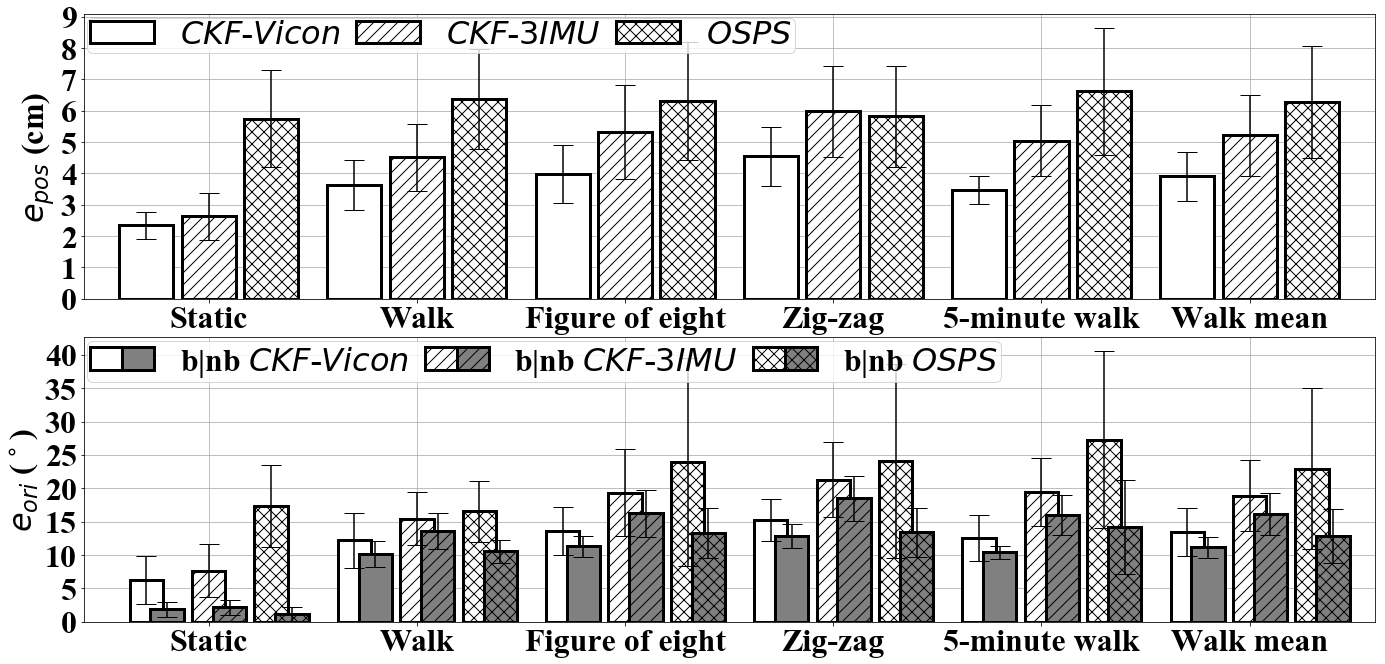

In [32]:
plt.rc('text', usetex=False)
plt.rc('font', family='Times New Roman', size=32)
#matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 10))

barchart(ax1, df_plot, 'dPos', width=1.5, barwidth=1.3)
ax1.set_yticks(np.arange(0,9.1,1))
ax1.set_ylabel(r'$e_{pos}$ (cm)')
ax1.grid(True)
barchart3(ax2, df_plot, 'dOri', 'dOrinobias', 'dOribias')
ax2.set_yticks(np.arange(0, 40.1, step=5))
ax2.set_ylabel(r'$e_{ori}$ ($^\circ$)')
ax2.grid(True)
handles, labels = ax2.get_legend_handles_labels()
handles2 = [(handles[i], handles[i+1]) for i in range(0,len(handles),2)]
ax1.legend(loc=2, ncol=4, borderpad=0.1, borderaxespad=0.1, labelspacing=0.1, columnspacing=0.5,
           frameon=True)
ax2.legend(handles2, ["b|nb {}".format(labels[i]) for i in range(0,len(labels),2)],
           loc=2, ncol=4, borderpad=0.1, borderaxespad=0.1, labelspacing=0.1, columnspacing=0.5,
           handler_map={i: HandlerTuple(ndivide=None, pad=0.) for i in handles2},
           frameon=True)

fig.tight_layout(h_pad=0)
fig.savefig('results-dposdorimean-bw.png', dpi=300, transparent=False, bbox_inches='tight', pad_inches=0)

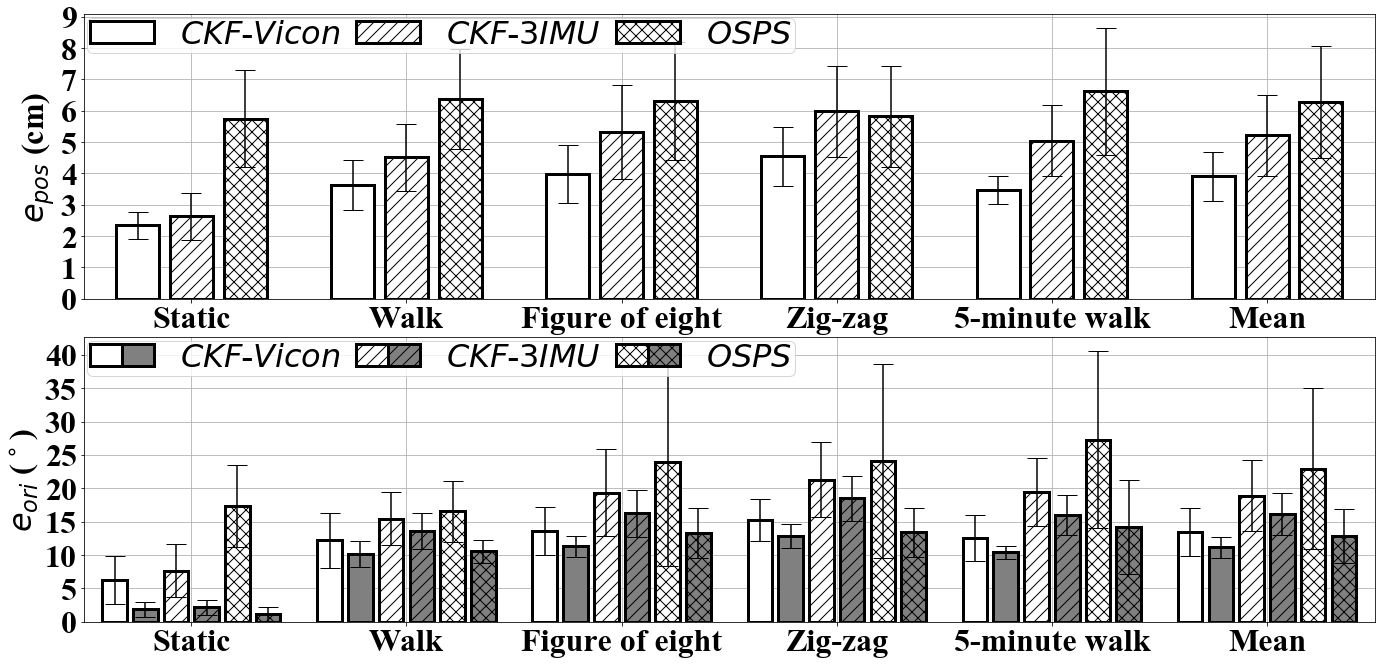

In [53]:
plt.rc('text', usetex=False)
plt.rc('font', family='Times New Roman', size=32)
#matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 10))

barchart(ax1, df_plot, 'dPos')
ax1.set_yticks(np.arange(0,9.1,1))
ax1.set_ylabel(r'$e_{pos}$ (cm)')
ax1.grid(True)
barchart2(ax2, df_plot, 'dOri', 'dOrinobias', 'dOribias')
ax2.set_yticks(np.arange(0, 40.1, step=5))
ax2.set_ylabel(r'$e_{ori}$ ($^\circ$)')
ax2.grid(True)
handles, labels = ax2.get_legend_handles_labels()
handles2 = [(handles[i], handles[i+1]) for i in range(0,len(handles),2)]
ax1.legend(loc=2, ncol=4, borderpad=0.1, borderaxespad=0.1, labelspacing=0.1, columnspacing=0.5,
           frameon=True)
ax2.legend(handles2, ["b|nb {}".format(labels[i]) for i in range(0,len(labels),2)],
           loc=2, ncol=4, borderpad=0.1, borderaxespad=0.1, labelspacing=0.1, columnspacing=0.5,
           handler_map={i: HandlerTuple(ndivide=None, pad=0.) for i in handles2},
           frameon=True)

fig.tight_layout(h_pad=0)
fig.savefig('results-dposdorimean-bw.png', dpi=300, transparent=False, bbox_inches='tight', pad_inches=0)

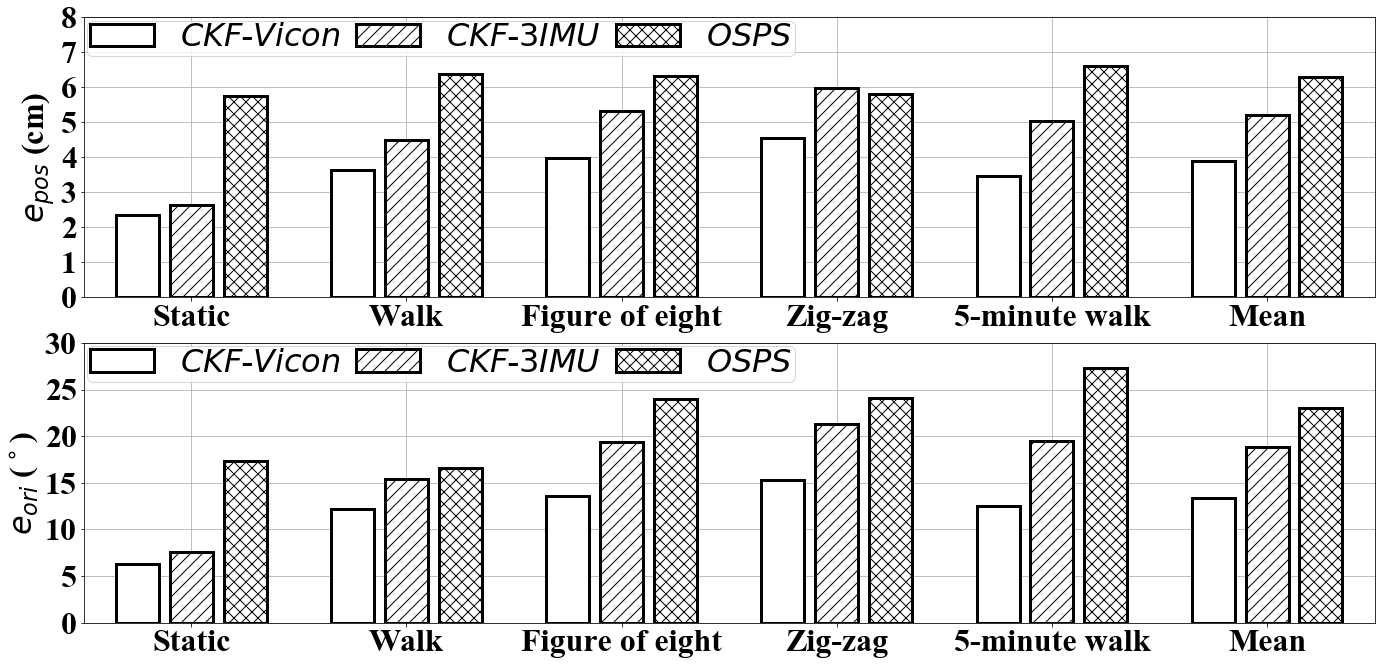

In [21]:
plt.rc('text', usetex=False)
plt.rc('font', family='Times New Roman', size=32)
#matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 10))

barchart(ax1, df_plot, 'dPos')
ax1.set_yticks(range(0,9,1))
ax1.set_ylabel(r'$e_{pos}$ (cm)')
ax1.grid(True)
barchart(ax2, df_plot, 'dOri')
ax2.set_yticks(np.arange(0, 30.1, step=5))
ax2.set_ylabel(r'$e_{ori}$ ($^\circ$)')
ax2.grid(True)
ax1.legend(loc=2, ncol=4, borderpad=0.1, borderaxespad=0.1, labelspacing=0.1, columnspacing=0.5)
ax2.legend(loc=2, ncol=4, borderpad=0.1, borderaxespad=0.1, labelspacing=0.1, columnspacing=0.5)

fig.tight_layout(h_pad=0)
fig.savefig('results-dposdorimean-bw.png', dpi=300, transparent=False, bbox_inches='tight', pad_inches=0)

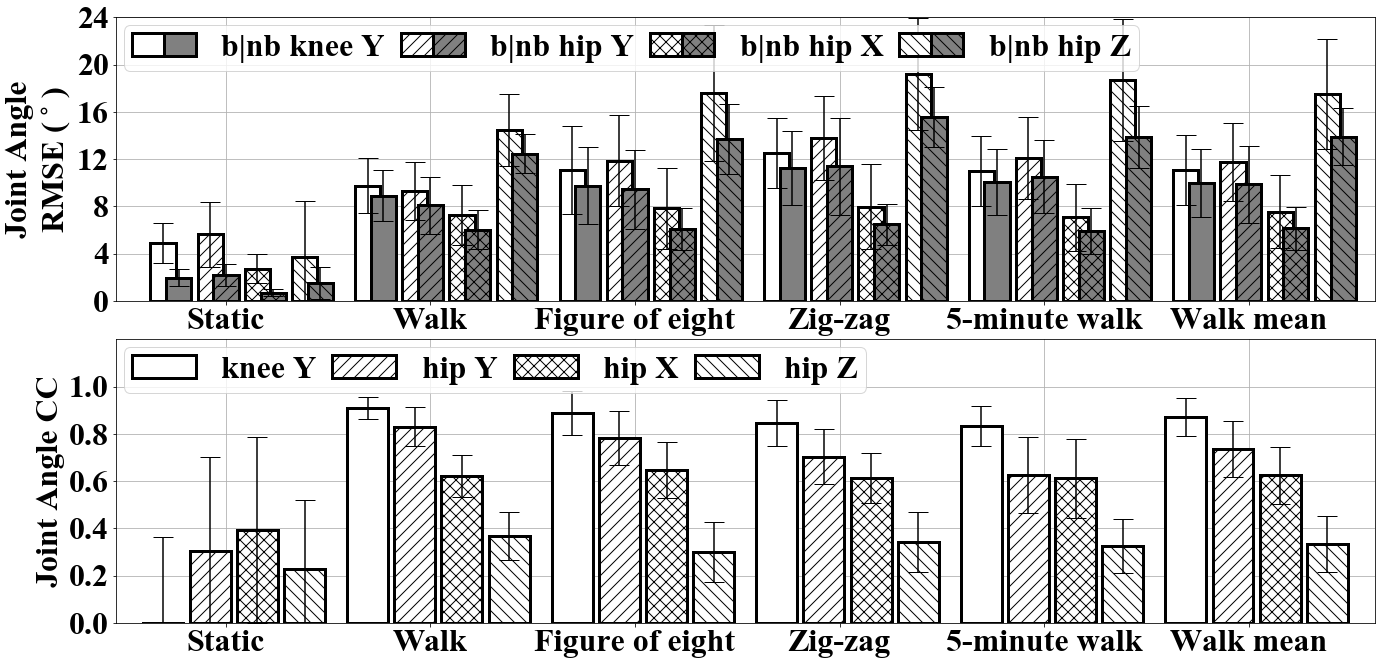

In [22]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 10))

barchart3(ax1, df_plot2, 'RMSE', 'RMSEnobias', 'Mean')
#ax1.set_yticks(range(0,30,5))
ax1.set_ylabel('Joint Angle\nRMSE ($^\circ$)')
ax1.set_yticks(np.arange(0,24.1,step=4))
ax1.set_ylim(0,24)
ax1.grid(True)
barchart(ax2, df_plot2, 'CorrCoef', barwidth=1.3, width=1.5)
ax2.set_ylabel('Joint Angle CC')
ax2.set_yticks(np.arange(0, 1.01, step=0.2))
ax2.set_ylim(0, 1.2)
ax2.grid(True)

handles, labels = ax1.get_legend_handles_labels()
handles2 = [(handles[i], handles[i+1]) for i in range(0,len(handles),2)]
ax1.legend(handles2, ["b|nb {}".format(labels[i]) for i in range(0,len(labels),2)],
           handler_map={i: HandlerTuple(ndivide=None, pad=0.) for i in handles2},           
           loc=2, ncol=4, borderpad=0.25, borderaxespad=0.25, labelspacing=0.1, columnspacing=0.5,
           frameon=True)
ax2.legend(loc=2, ncol=4, borderpad=0.25, borderaxespad=0.25, labelspacing=0.1, columnspacing=0.5,
           frameon=True)

fig.tight_layout(h_pad=0)
fig.savefig('results-kneehiprmsecc-bw.png', dpi=300, transparent=False, bbox_inches='tight', pad_inches=0)

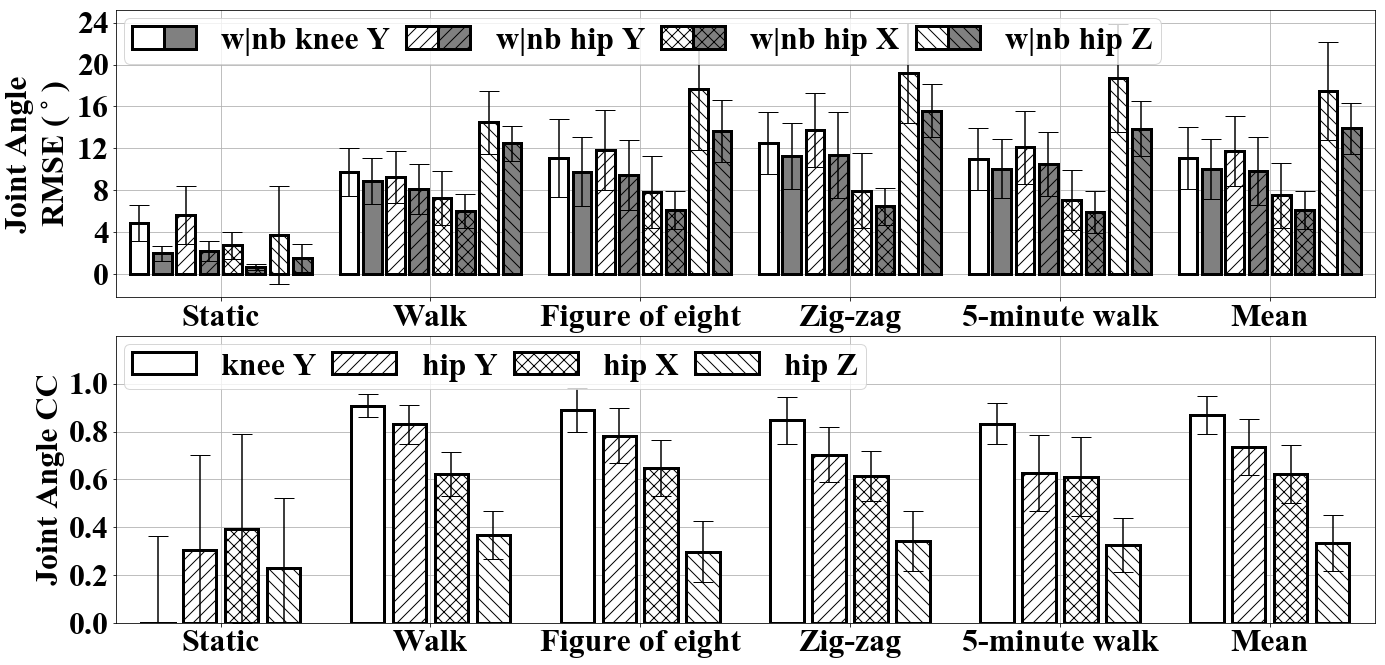

In [54]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 10))

barchart2(ax1, df_plot2, 'RMSE', 'RMSEnobias', 'Mean')
#ax1.set_yticks(range(0,30,5))
ax1.set_ylabel('Joint Angle\nRMSE ($^\circ$)')
ax1.set_yticks(np.arange(0,24.1,step=4))
ax1.grid(True)
barchart(ax2, df_plot2, 'CorrCoef')
ax2.set_ylabel('Joint Angle CC')
ax2.set_yticks(np.arange(0, 1.01, step=0.2))
ax2.set_ylim(0, 1.2)
ax2.grid(True)

handles, labels = ax1.get_legend_handles_labels()
handles2 = [(handles[i], handles[i+1]) for i in range(0,len(handles),2)]
ax1.legend(handles2, ["b|nb {}".format(labels[i]) for i in range(0,len(labels),2)],
           handler_map={i: HandlerTuple(ndivide=None, pad=0.) for i in handles2},           
           loc=2, ncol=4, borderpad=0.25, borderaxespad=0.25, labelspacing=0.1, columnspacing=0.5,
           frameon=True)
ax2.legend(loc=2, ncol=4, borderpad=0.25, borderaxespad=0.25, labelspacing=0.1, columnspacing=0.5,
           frameon=True)

fig.tight_layout(h_pad=0)
fig.savefig('results-kneehiprmsecc-bw.png', dpi=300, transparent=False, bbox_inches='tight', pad_inches=0)

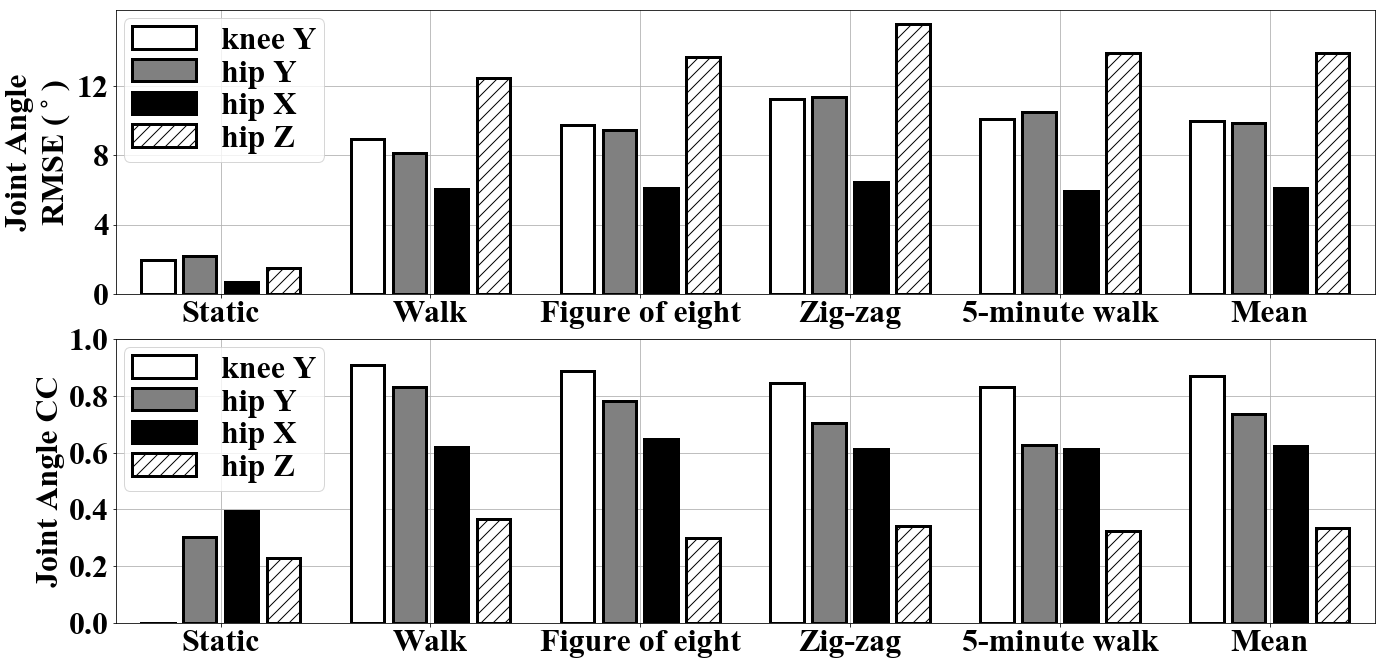

In [31]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 10))

barchart(ax1, df_plot2, 'RMSEnobias')
#ax1.set_yticks(range(0,30,5))
ax1.set_ylabel('Joint Angle\nRMSE ($^\circ$)')
ax1.set_yticks(np.arange(0,16,step=4))
ax1.grid(True)
barchart(ax2, df_plot2, 'CorrCoef')
ax2.set_ylabel('Joint Angle CC')
ax2.set_yticks(np.arange(0, 1.01, step=0.2))
ax2.set_ylim(0, 1.0)
ax2.grid(True)
ax1.legend(loc=2, ncol=1, borderpad=0.25, borderaxespad=0.25, labelspacing=0.1)
ax2.legend(loc=2, ncol=1, borderpad=0.25, borderaxespad=0.25, labelspacing=0.1)

fig.tight_layout(h_pad=0)
fig.savefig('results-kneehiprmsecc-bw.png', dpi=300, transparent=False, bbox_inches='tight', pad_inches=0)

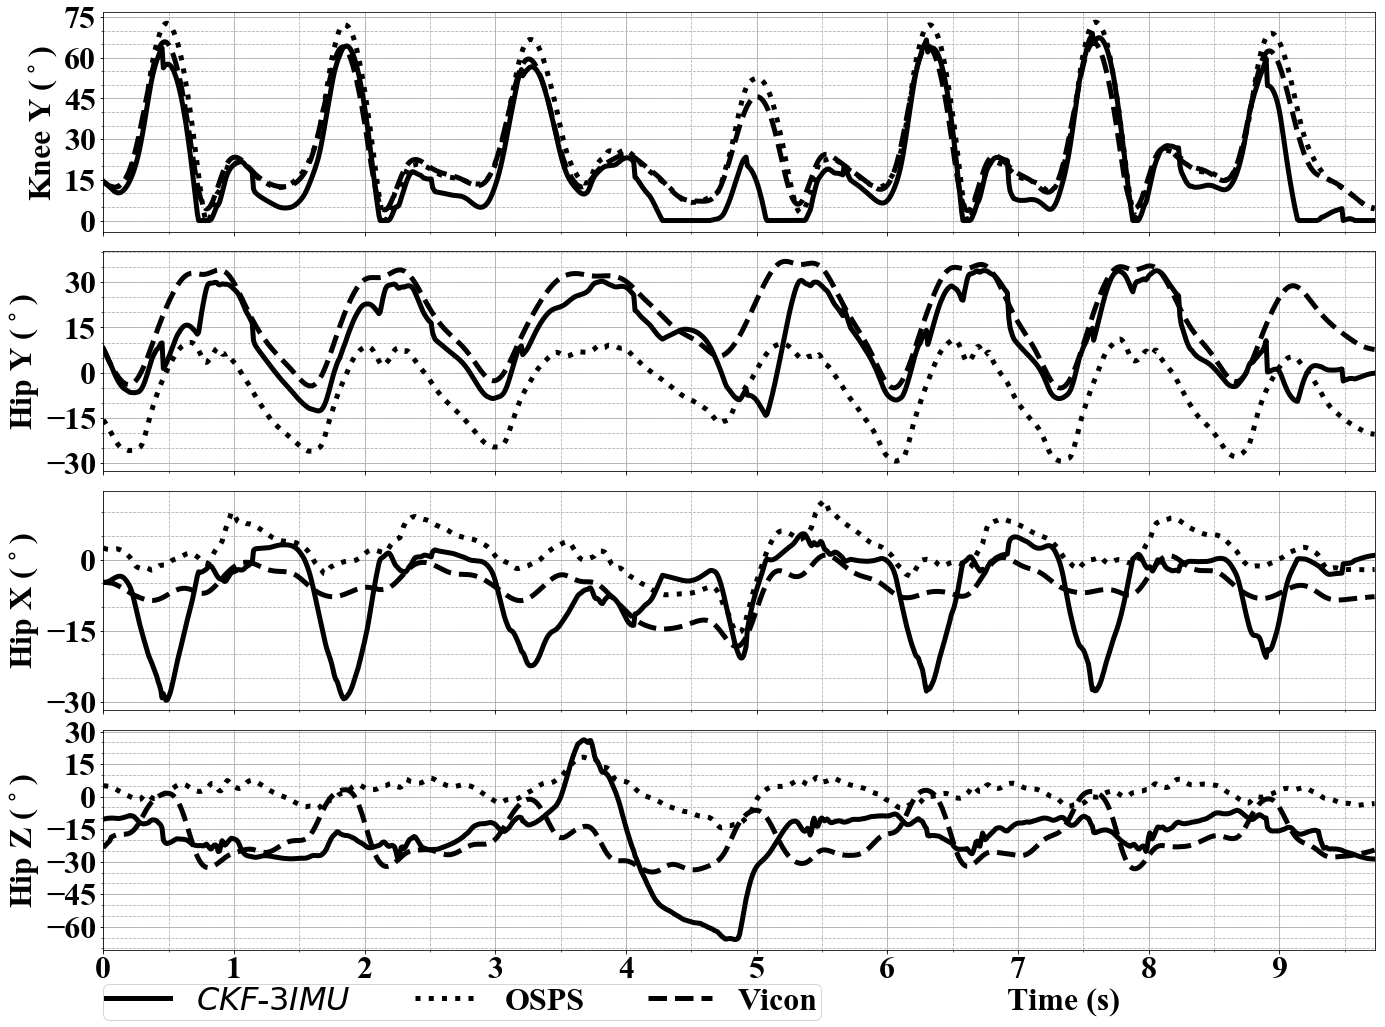

In [43]:
df = pd.read_csv("ckf-samplequalitative.csv")

plt.rc('font', family='Times New Roman', size=32)

fig, ax = plt.subplots(4, figsize=(20, 15))
width = 5

lList = ["Knee Y ($^\circ$)", "Hip Y ($^\circ$)", "Hip X ($^\circ$)", "Hip Z ($^\circ$)"]
vList = ['$\it{CKF}$-$\it{3IMU}$', 'OSPS', 'Vicon']
fmtList = ['k-', 'k:', 'k--']
hList = ['', '']
t = np.arange(df.shape[0])/100

for i in range(0,4):
    for j in range(0,3):
        ax[i].plot(t, df.iloc[:,4*j+i], fmtList[j], linewidth=width, label=vList[j])
    ax[i].set_ylabel(lList[i])
    ax[i].grid(True, which='major', linestyle='-', zorder=0)
    ax[i].grid(True, which='minor', linestyle='--')
    
    ax[i].xaxis.set_major_locator(plt.MultipleLocator(1))
    ax[i].xaxis.set_minor_locator(plt.MultipleLocator(0.5))
    
    ax[i].yaxis.set_major_locator(plt.MultipleLocator(15))
    ax[i].yaxis.set_minor_locator(plt.MultipleLocator(5))
    
    if i!=3:
        ax[i].set_xticklabels([])
        
    ax[i].set_xlim([t[0], t[-1]])
    
    (ymin, ymax) = ax[i].get_ylim()
    # ax[i].setp(ax[3].get_xticklabels(), visible=False)
    #ax2.legend(loc=2, ncol=3, borderpad=0.1, borderaxespad=0.1, labelspacing=0.1, columnspacing=0.5)
ax[-1].set_xlabel("Time (s)", horizontalalignment='right', x=0.8)
ax[-1].legend(bbox_to_anchor=(0., -0.32, 0., 0.0), loc='lower left',
           ncol=3, borderaxespad=0., borderpad=0.1, labelspacing=0.0)

fig.tight_layout(h_pad=0)
fig.savefig('ckf-kneehip-angle-sample.png', dpi=300, transparent=False)